In [1]:
# import libraries
library(ggplot2)
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots

In [2]:
# adding the file path probability file
proba_path <- file.path("../../../results/3.jump_analysis/JUMP_injury_proba.csv.gz")

# loading in probability file path
proba_df <- read.table(proba_path, head = TRUE, sep=",")

# replacing True and False to shuffled to non shuffled
proba_df$shuffled_model <- ifelse(proba_df$shuffled_model == "False", "Not Shuffled",
                                      ifelse(proba_df$shuffled_model == "True", "Shuffled", proba_df$shuffled_model))
# displaying
print(dim(proba_df))
head(proba_df)

[1] 1169880       4


,shuffled_model,pred_injury,injury_type,proba
,<chr>,<chr>,<chr>,<dbl>
1,Not Shuffled,Kinase,Control,3.485574e-13
2,Not Shuffled,Kinase,Control,1.077476e-08
3,Not Shuffled,Kinase,Control,1.379263e-06
4,Not Shuffled,Ferroptosis,Control,4.254261e-09
5,Not Shuffled,Kinase,Control,8.860754e-07
6,Not Shuffled,Kinase,Control,3.600769e-08


In [3]:
# showing the unique injuries
unique(proba_df$injury_type)

[1] "Control"              "Cytoskeletal"         "Hsp90"               
 [4] "Kinase"               "Genotoxin"            "Miscellaneous"       
 [7] "Redox"                "HDAC"                 "mTOR"                
[10] "Proteasome"           "Saponin"              "Mitochondria"        
[13] "Ferroptosis"          "Tannin"               "Nonspecific reactive"

Warning message in brewer.pal(2, "Dark2"):
“minimal value for n is 3, returning requested palette with 3 different levels
”
Picking joint bandwidth of 0.00659

Picking joint bandwidth of 0.00549

Picking joint bandwidth of 0.00546

Picking joint bandwidth of 0.00712

Picking joint bandwidth of 0.009

Picking joint bandwidth of 0.00733

Picking joint bandwidth of 0.00689

Picking joint bandwidth of 0.00651

Picking joint bandwidth of 0.00743

Picking joint bandwidth of 0.00476

Picking joint bandwidth of 0.00645

Picking joint bandwidth of 0.00702

Picking joint bandwidth of 0.00736

Picking joint bandwidth of 0.00729

Picking joint bandwidth of 0.00647

Picking joint bandwidth of 0.00659

Picking joint bandwidth of 0.00549

Picking joint bandwidth of 0.00546

Picking joint bandwidth of 0.00712

Picking joint bandwidth of 0.009

Picking joint bandwidth of 0.00733

Picking joint bandwidth of 0.00689

Picking joint bandwidth of 0.00651

Picking joint bandwidth of 0.00743

Picking joint ba

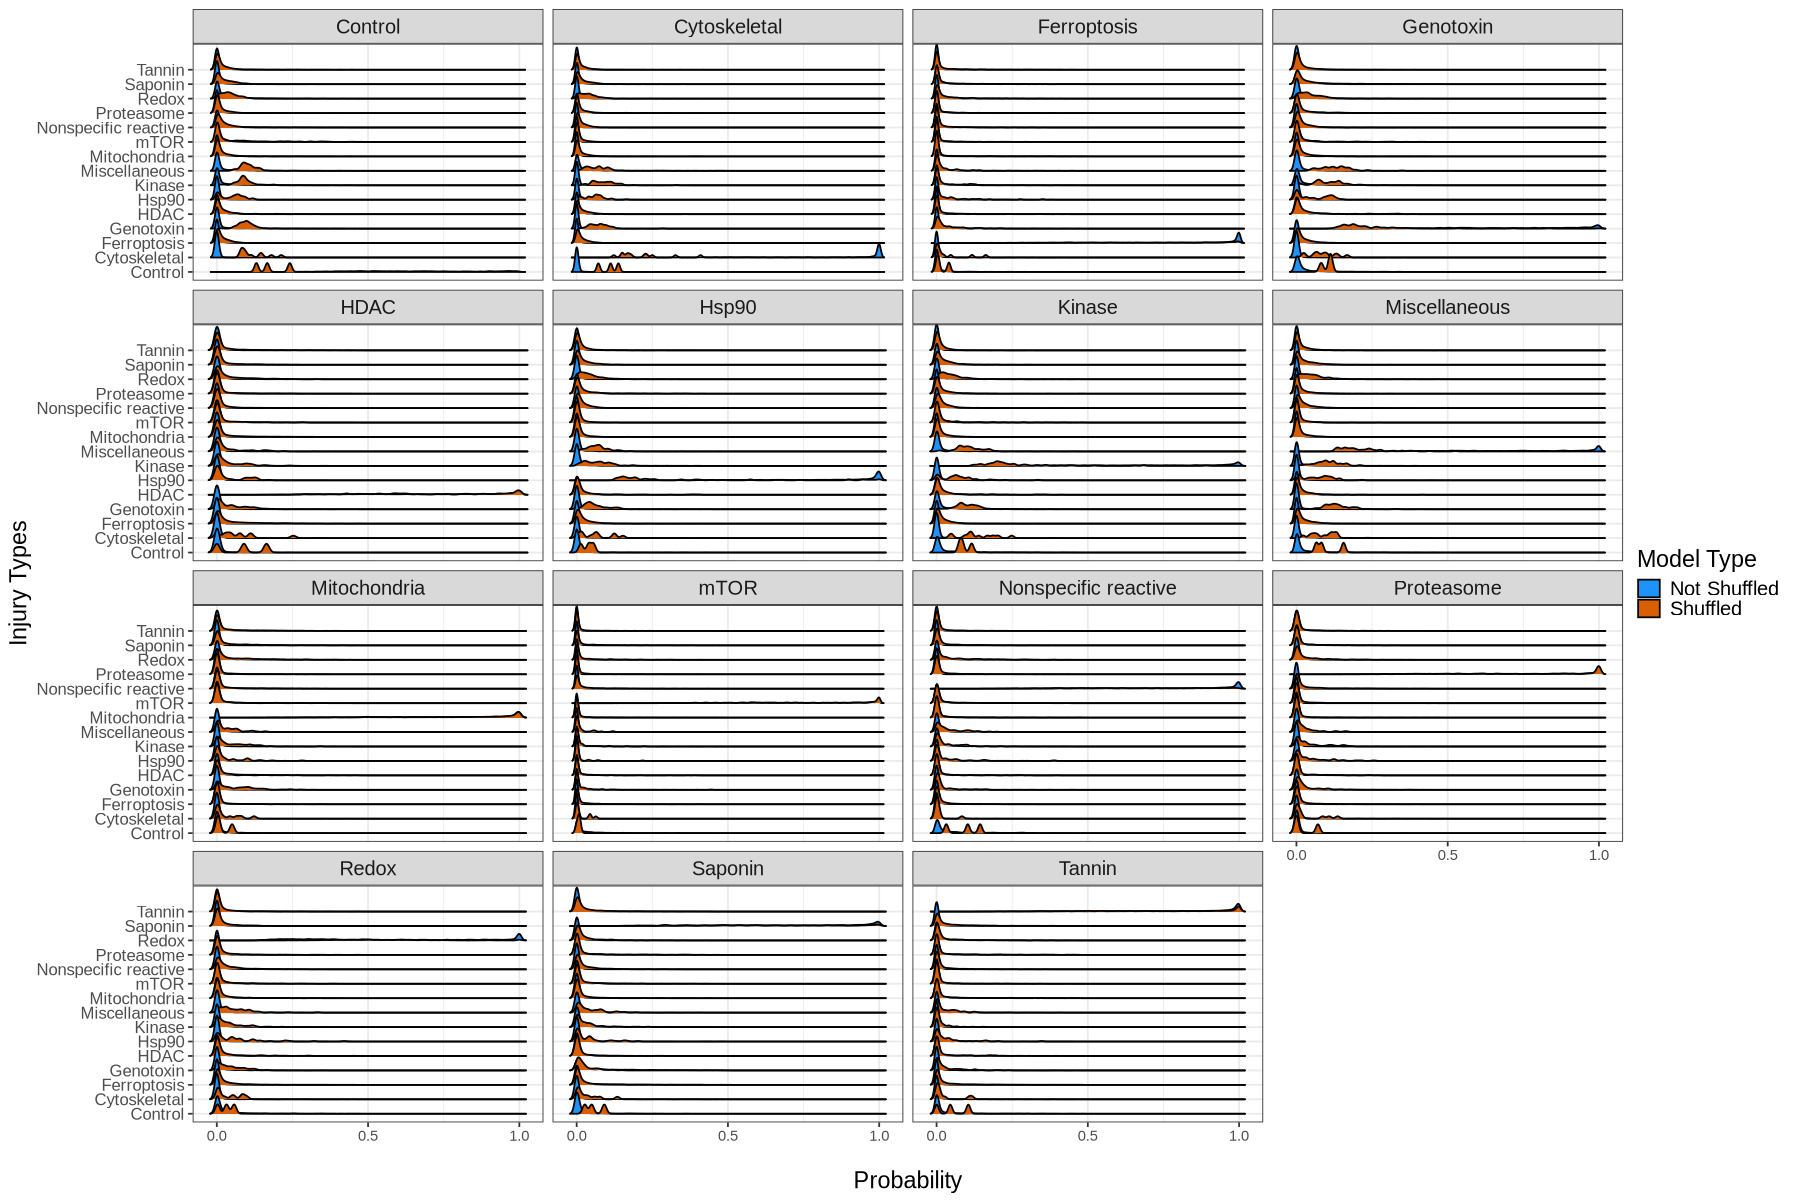

In [4]:
# image size
img_height <- 10
img_width <- 15

options(repr.plot.width = img_width, repr.plot.height = img_height)
ridge_plot <- (
    ggplot(proba_df, aes(x = proba, y = pred_injury, fill = shuffled_model)) +
    geom_density_ridges() +
    facet_wrap(~injury_type) +
    scale_x_continuous(breaks = seq(0, 1, 0.5)) +
    theme_bw() +

    # no legend
    theme(plot.title = element_text(size = 20, hjust = 0.5)) +

    scale_fill_manual(values = c(
    "Shuffled" = brewer.pal(2, "Dark2")[2],
    "Not Shuffled" = "#1E93FC"
    )) +

    theme(
        axis.title.x = element_blank(),
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.1, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        strip.text = element_text(size = 12),
        axis.text.y = element_text(size = 10),
        axis.title = element_text(size = 14),
        axis.title.x.bottom = element_text(margin = margin(t = 15)),
        axis.title.y.left = element_text(margin = margin(t = 15)),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
        )) +

    labs(y = "Injury Types", x = "Probability", fill = "Model Type") 

ridge_plot

ggsave(filename = "JUMP_cell_injury_facet_proba.png", height = img_height, width = img_width, dpi=600)
